## Load Dataset

In [1]:
#!curl https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data -O
#!curl https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names -O

In [2]:
!cat adult.names

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from collections import Counter

In [4]:
df = pd.read_csv('adult.data',delimiter=',',
                      names=['age', 'workclass', 'fnlwgt', 'education', 'education_lvl', 'martial', 'occupation', 'relationship',
                       'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', '50K'])

In [5]:
df.head()

,age,workclass,fnlwgt,education,education_lvl,martial,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


(array([1.3117e+04, 1.5327e+04, 3.4980e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  12285.,  159527.,  306769.,  454011.,  601253.,  748495.,
         895737., 1042979., 1190221., 1337463., 1484705.]),
 <a list of 10 Patch objects>)

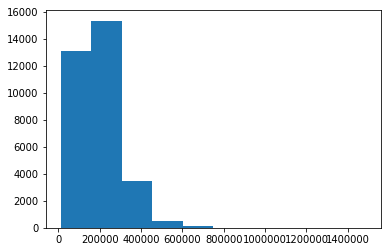

In [6]:
plt.hist(df['fnlwgt']) # weighting for entry being representative of population

In [7]:
df.shape

(32561, 15)

In [8]:
# check if there are any null values in dataset
df.isnull().values.any()

False

In [9]:
print(df['50K'].unique()) # Whitespaces detected, Need to convert classifer to 1 or 0 for dataset anaylsis
df['50K'] = df['50K'].map(str.strip)
print(df['50K'].unique())
df['50K'] = df['50K'].map(lambda x: 1 if '>' in x else 0) # convert step here, just look for '>' symbol for above 50k
print(df['50K'].unique())

[' <=50K' ' >50K']
['<=50K' '>50K']
[0 1]


25% of people in the dataset earn over 50K, will need to keep this in mind when looking the graphs and evaluating model accurancy.

Our mapping to 0,1 works.

From Doc:
- Probability for the label '&gt;50K'  : 23.93% / 24.78% (without unknowns)
- Probability for the label '&lt;=50K' : 76.07% / 75.22% (without unknowns)

In [10]:
df_50k = df[(df['50K'] == 1)]
df_non_50k = df[(df['50K'] == 0)]
print("Dataset has {:<5} entries that are 50k {:.2f}%".format(len(df_50k), len(df_50k) / len(df) * 100))
print("Dataset has {:<5} entries that are non 50k {:.2f}%".format(len(df_non_50k), len(df_non_50k) / len(df) * 100))

Dataset has 7841  entries that are 50k 24.08%
Dataset has 24720 entries that are non 50k 75.92%


In [11]:
df_50k.head()

,age,workclass,fnlwgt,education,education_lvl,martial,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1


In [12]:
df_non_50k.head()

,age,workclass,fnlwgt,education,education_lvl,martial,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Graph below shows minute differences in the two datasets, a decision tree can take advantage of the slight bimodal distribution shown 

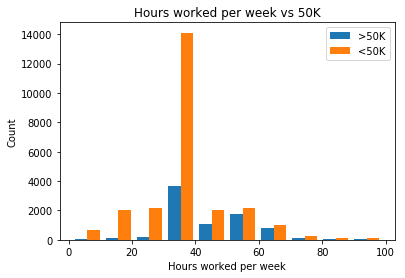

In [13]:
# check most obvious columns show expected values
hours_worked_50k = df_50k['hours_per_week']
hours_worked_non_50k = df_non_50k['hours_per_week']
plt.hist([hours_worked_50k, hours_worked_non_50k], label=['>50K', '<50K'])
plt.title("Hours worked per week vs 50K")
plt.legend(loc='upper right')
plt.xlabel('Hours worked per week')
plt.ylabel('Count')
plt.show()
plt.close()

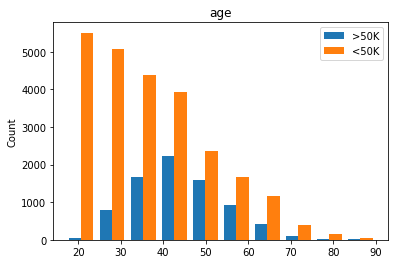

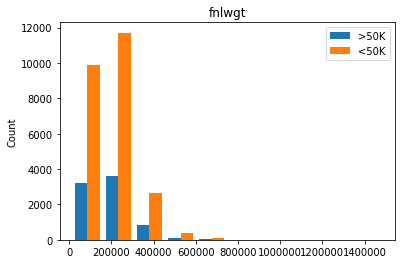

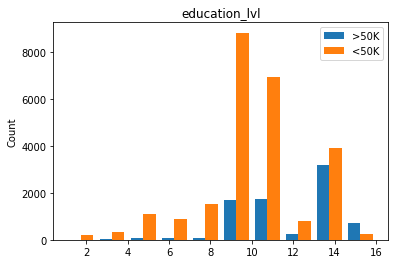

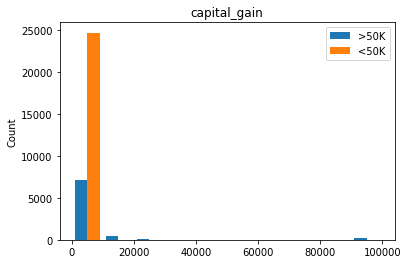

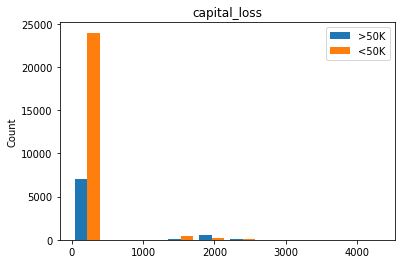

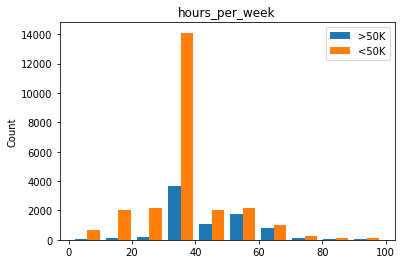

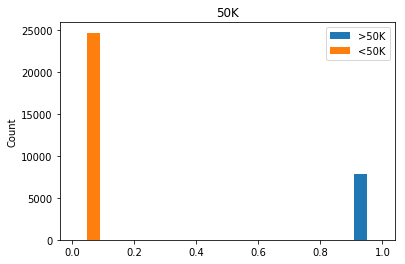

In [14]:
# Plot all numerical columns 50k vs non 50k for a quick look to make sure they can be used in decision trees
def create_pair_hist(df50k, dfnon50k):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    newdf = df50k.select_dtypes(include=numerics)
    for col in newdf:
        plt.hist([df50k[col], dfnon50k[col]], label=['>50K', '<50K'])
        plt.title(col)
        plt.legend(loc='upper right')
        plt.ylabel('Count')
        plt.show()
        plt.close()
create_pair_hist(df_50k, df_non_50k)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78c1536048>,
      dtype=object)

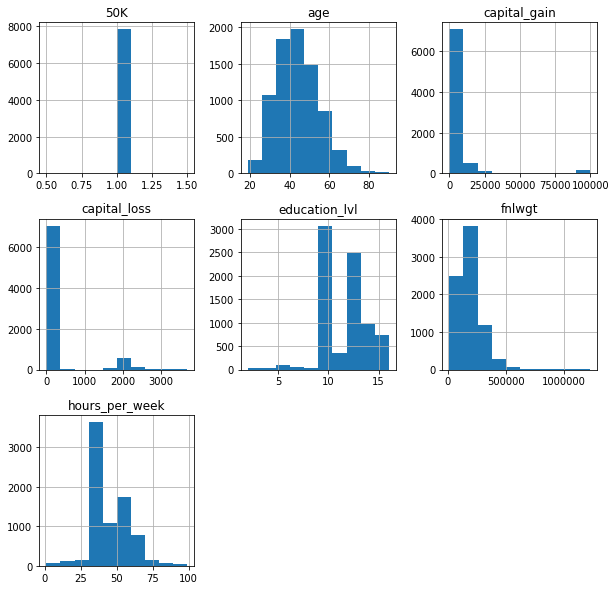

In [15]:
# create histogram of all numeric >50k columns. Compare Distributions
df_50k.hist(figsize=(10,10))

In [16]:
def plot_hist_object(obj_column_name):
    count_non = Counter(df_non_50k[obj_column_name])
    count_non_pd = pd.DataFrame.from_dict(count_non, orient='index')
    count_non_pd.plot(kind='bar', title='No 50k')
    count = Counter(df_50k[obj_column_name])
    count_pd = pd.DataFrame.from_dict(count, orient='index')
    count_pd.plot(kind='bar', title='Yes 50K')

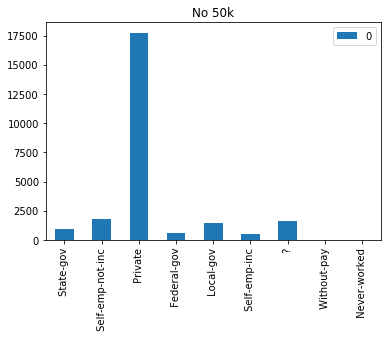

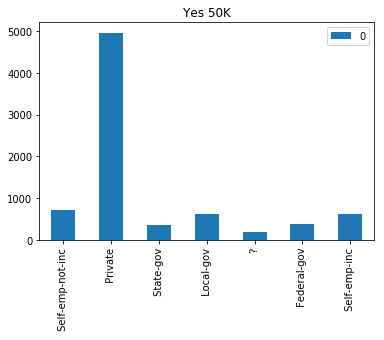

In [17]:
# object column histogram
plot_hist_object('workclass')

In [18]:
Counter(df_non_50k['workclass'])

Counter({' State-gov': 945,
         ' Self-emp-not-inc': 1817,
         ' Private': 17733,
         ' Federal-gov': 589,
         ' Local-gov': 1476,
         ' Self-emp-inc': 494,
         ' ?': 1645,
         ' Without-pay': 14,
         ' Never-worked': 7})

In [19]:
Counter(df_50k['workclass']) # seems no one withoutpay will be over 50k

Counter({' Self-emp-not-inc': 724,
         ' Private': 4963,
         ' State-gov': 353,
         ' Local-gov': 617,
         ' ?': 191,
         ' Federal-gov': 371,
         ' Self-emp-inc': 622})

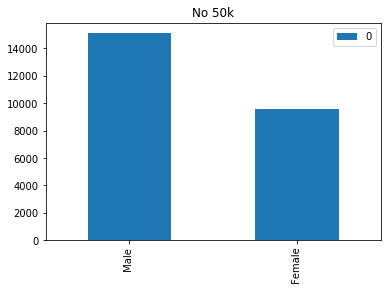

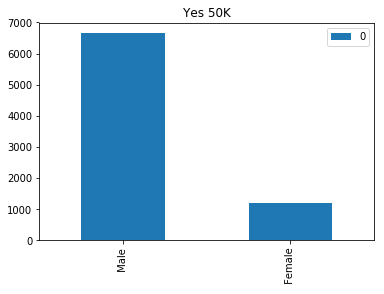

In [20]:
plot_hist_object('sex')

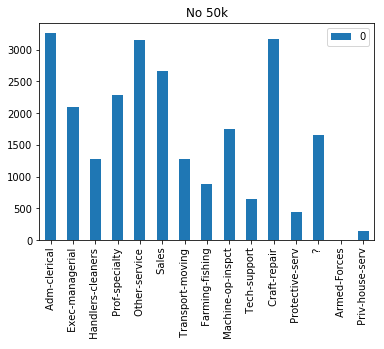

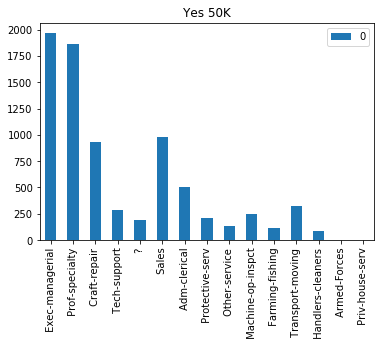

In [21]:
plot_hist_object('occupation')

In [22]:
# fix sex numerically
df_sex = df.copy()
df_sex['sex'] = df_sex['sex'].map(str.strip)
df_sex['sex'] = df_sex['sex'].map(lambda x: 1 if 'Male' == x else 0)
df_sex.head()

,age,workclass,fnlwgt,education,education_lvl,martial,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


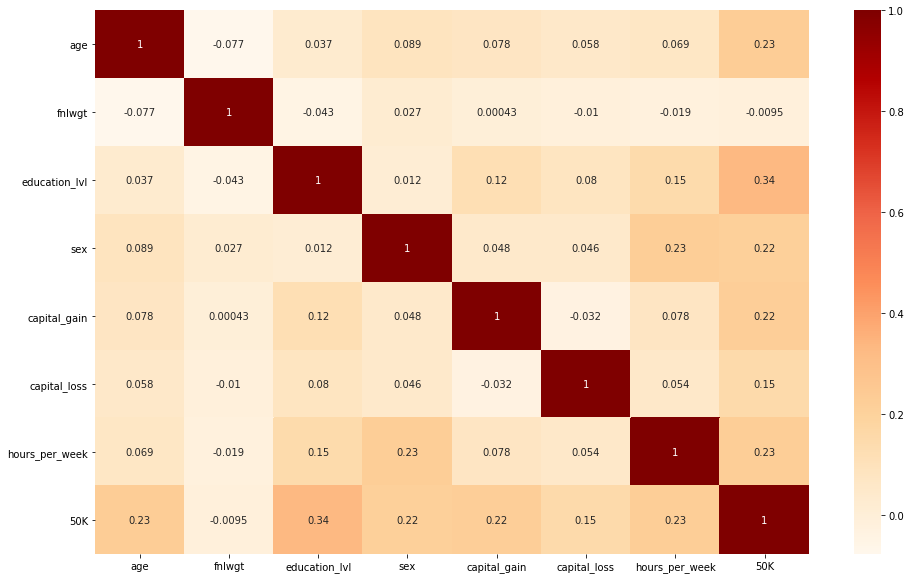

In [23]:
# check what variables are correlated, most promising is age, education_level, sex, hour_per_week, and capital_gain
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = df_sex.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78c1572048>,
      dtype=object)

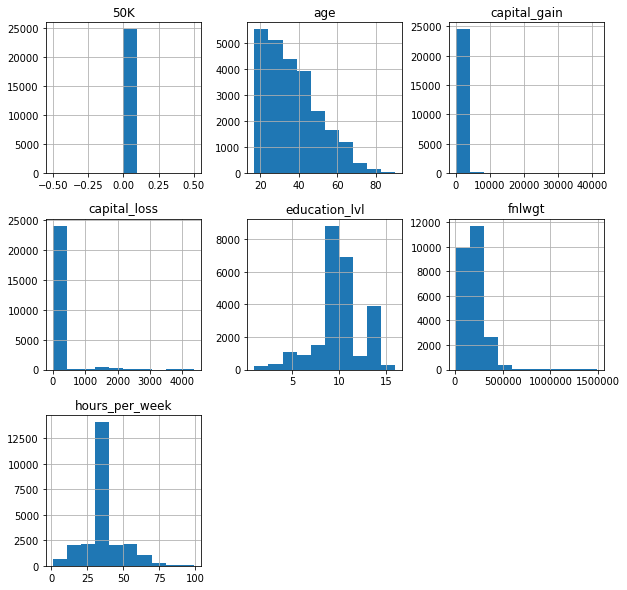

In [24]:
# create histogram of all numeric <50k columns. Compare Distributions
df_non_50k.hist(figsize=(10,10))

In [25]:
# summary of dataset
df.describe()

,age,fnlwgt,education_lvl,capital_gain,capital_loss,hours_per_week,50K
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [26]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_lvl      int64
martial           object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
50K                int64
dtype: object

## Cleaning Data
We're going to first try to include everything except fnlwgt, native_country.
- fnlwgt can be applied if we require some values to have more 'weighting', but this is usually reflected in the fitting anyhow, will remove since is not relevant to decision trees.
- native_country has too many options. may introduce later on to see if it improves accuracy. But for now we have enough variables for a rather peformance intesive random forest tree

In [27]:
# Work on copy of data so we can compare cleaned to old set
# Call copy() to set is_copy to false and not trigger chain warning for assignments
selected_columns = ['workclass', 'age', 'education_lvl', 'martial', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', '50K']
dfclean = df[selected_columns].copy()

#### Removing white space

In [28]:
m_labels = ['martial', 'occupation', 'relationship', 'race', 'sex', 'workclass']
def print_unique(m_labels, df):
    accepted_col_values = {}
    for label in m_labels:
        accepted_col_values[label] = df[label].unique()
        s_values = ["- '{}'".format(x) for x in df[label].unique()]
        s_values = "\n".join(s_values)
        print("Unique Values Column '{}':".format(label))
        print(s_values)
        print()
    return accepted_col_values

In [29]:
accepted_cols = print_unique(m_labels, dfclean)

Unique Values Column 'martial':
- ' Never-married'
- ' Married-civ-spouse'
- ' Divorced'
- ' Married-spouse-absent'
- ' Separated'
- ' Married-AF-spouse'
- ' Widowed'

Unique Values Column 'occupation':
- ' Adm-clerical'
- ' Exec-managerial'
- ' Handlers-cleaners'
- ' Prof-specialty'
- ' Other-service'
- ' Sales'
- ' Craft-repair'
- ' Transport-moving'
- ' Farming-fishing'
- ' Machine-op-inspct'
- ' Tech-support'
- ' ?'
- ' Protective-serv'
- ' Armed-Forces'
- ' Priv-house-serv'

Unique Values Column 'relationship':
- ' Not-in-family'
- ' Husband'
- ' Wife'
- ' Own-child'
- ' Unmarried'
- ' Other-relative'

Unique Values Column 'race':
- ' White'
- ' Black'
- ' Asian-Pac-Islander'
- ' Amer-Indian-Eskimo'
- ' Other'

Unique Values Column 'sex':
- ' Male'
- ' Female'

Unique Values Column 'workclass':
- ' State-gov'
- ' Self-emp-not-inc'
- ' Private'
- ' Federal-gov'
- ' Local-gov'
- ' ?'
- ' Self-emp-inc'
- ' Without-pay'
- ' Never-worked'



In [30]:
# strip values in columns
for l in m_labels:
    dfclean[l] = dfclean[l].map(str.strip)

In [31]:
accepted_cols = print_unique(m_labels, dfclean)

Unique Values Column 'martial':
- 'Never-married'
- 'Married-civ-spouse'
- 'Divorced'
- 'Married-spouse-absent'
- 'Separated'
- 'Married-AF-spouse'
- 'Widowed'

Unique Values Column 'occupation':
- 'Adm-clerical'
- 'Exec-managerial'
- 'Handlers-cleaners'
- 'Prof-specialty'
- 'Other-service'
- 'Sales'
- 'Craft-repair'
- 'Transport-moving'
- 'Farming-fishing'
- 'Machine-op-inspct'
- 'Tech-support'
- '?'
- 'Protective-serv'
- 'Armed-Forces'
- 'Priv-house-serv'

Unique Values Column 'relationship':
- 'Not-in-family'
- 'Husband'
- 'Wife'
- 'Own-child'
- 'Unmarried'
- 'Other-relative'

Unique Values Column 'race':
- 'White'
- 'Black'
- 'Asian-Pac-Islander'
- 'Amer-Indian-Eskimo'
- 'Other'

Unique Values Column 'sex':
- 'Male'
- 'Female'

Unique Values Column 'workclass':
- 'State-gov'
- 'Self-emp-not-inc'
- 'Private'
- 'Federal-gov'
- 'Local-gov'
- '?'
- 'Self-emp-inc'
- 'Without-pay'
- 'Never-worked'



In [32]:
dfclean.head()

,workclass,age,education_lvl,martial,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,50K
0,State-gov,39,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0
1,Self-emp-not-inc,50,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0
2,Private,38,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0
3,Private,53,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0
4,Private,28,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0


#### Set Dummy variables
This allows us to use text variables in decision trees. Helping improve accuracy 

In [33]:
# dummy variables
columns_to_dummy = dfclean.select_dtypes(include='object').columns
dfclean = pd.get_dummies(dfclean, columns=columns_to_dummy)
dfclean.head()

,age,education_lvl,capital_gain,capital_loss,hours_per_week,50K,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,9,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,7,0,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,13,0,0,40,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [34]:
dfclean.shape

(32561, 50)

## Build and Train Model

### Random Forest
Randomforest is selected because it is easy to use without much danger of overfitting.

However the trade off is performance.

In [35]:
from sklearn.model_selection import train_test_split
# split data. leave aside 20% for testing, won't be used in training to help test overfitting.
train_x, test_x, train_y, test_y = train_test_split(dfclean.drop('50K', axis=1), dfclean['50K'], test_size=0.2, random_state=42)

In [36]:
test_x.head()

,age,education_lvl,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
14160,27,10,0,0,38,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
27048,45,9,0,0,40,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
28868,29,13,0,0,55,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
5667,30,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
7827,29,10,2202,0,50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [37]:
test_y.head()

14160    0
27048    0
28868    1
5667     0
7827     0
Name: 50K, dtype: int64

In [38]:
from sklearn.ensemble import RandomForestClassifier
# create the model suing default parameters
model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

## Evaluate Performance
Or model, performace adjusted for the ~20% difference in classifiers avaliable for training, shows an above 80% expected accuracy from decision trees.
This is very good for a random forest classfier so we're gonna keep it for now.

In [39]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.8507600184246891

In [40]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)
roc_auc_score(test_y, probabilities[:, 1])

0.8774033402362373

In [41]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.9534883720930233

## Model Wrapper for manual predictions

In [42]:
# Double check model is actually predicting test_x
model.predict_proba(pd.DataFrame([test_x.iloc[1]]))[0][0]

0.1

In [43]:
# print variable storages for the input class object (because we have too many variables)
dummy_cols = [col for col in df.select_dtypes(include='object').columns if col in selected_columns]
for x in dummy_cols:
    print("self.{}:str = ''".format(x))

non_dummy_cols = [col for col in df.select_dtypes(exclude='object').columns if col in selected_columns]
for x in non_dummy_cols:
    if x != '50K':
        print("self.{}:int = 0".format(x))

self.workclass:str = ''
self.martial:str = ''
self.occupation:str = ''
self.relationship:str = ''
self.race:str = ''
self.sex:str = ''
self.age:int = 0
self.education_lvl:int = 0
self.capital_gain:int = 0
self.capital_loss:int = 0
self.hours_per_week:int = 0


In [44]:
# This is a prototype version of a wrapper class designed for marking purposes (ease of reading and usage)
# In production, intialization of parameters will be dynamic so that field changes will not require __init__ to be changed
class QueryPerson():
    def __init__(self):
        self.workclass:str = ''
        self.martial:str = ''
        self.occupation:str = ''
        self.relationship:str = ''
        self.race:str = ''
        self.sex:str = ''
        self.age:int = 0
        self.education_lvl:int = 0
        self.capital_gain:int = 0
        self.capital_loss:int = 0
        self.hours_per_week:int = 0
        
    def check_values(self):
        m_dict = vars(self)
        for key in m_dict.keys():
            value = m_dict[key]
            print(key + ':', value)
            if key in accepted_cols.keys() and value not in accepted_cols[key]:
                raise ValueError("{}='{}' not acceptable, use: {}".format(key, value, accepted_cols[key]))
        print('Check Values OK')
        
    def get_pandas_frame(self):
        query_dict = vars(self)
    
        dummy_query_dict = {}

        for k, v in query_dict.items():
            if k in dummy_cols:

                for v2 in accepted_cols[k]:
                    dummy_k = '{}_{}'.format(k, v2)
                    if v2 == v:
                        dummy_query_dict[dummy_k] = 1
                    else:
                        dummy_query_dict[dummy_k] = 0
            elif k in selected_columns:
                dummy_query_dict[k] = v
            else:
                print('Ignoring {}:{}'.format(k, v))
        # this took a few mins to figure out, order matters
        # https://stackoverflow.com/questions/51663071/sklearn-fit-vs-predict-order-of-columns-matters
        incorrect_column_order = pd.DataFrame([dummy_query_dict])
        correct_column_order = incorrect_column_order[test_x.columns]
        return correct_column_order

def predict_50k_income(query: QueryPerson):
    q = query.get_pandas_frame()
    return model.predict_proba(q)[0][1]

In [45]:
q = QueryPerson()
q.workclass = 'State-gov'
q.martial = 'Married-civ-spouse'
q.occupation = 'Exec-managerial'
q.relationship = 'Unmarried'
q.race = 'White'
q.sex = 'Female'
q.age = 45
q.education_lvl = 9
q.hours_per_week = 40
q.check_values()

print("Predicted >50K Income chance: {}".format(predict_50k_income(q)))

workclass: State-gov
martial: Married-civ-spouse
occupation: Exec-managerial
relationship: Unmarried
race: White
sex: Female
age: 45
education_lvl: 9
capital_gain: 0
capital_loss: 0
hours_per_week: 40
Check Values OK
Predicted >50K Income chance: 0.7


In [46]:
q1 = QueryPerson()
q1.workclass = 'Never-worked'
q1.martial = 'Divorced'
q1.occupation = '?'
q1.relationship = 'Unmarried'
q1.race = 'White'
q1.sex = 'Female'
q1.age = 45
q1.education_lvl = 7
q1.hours_per_week = 10
q1.check_values()

workclass: Never-worked
martial: Divorced
occupation: ?
relationship: Unmarried
race: White
sex: Female
age: 45
education_lvl: 7
capital_gain: 0
capital_loss: 0
hours_per_week: 10
Check Values OK


In [47]:
pd.set_option('display.max_columns', 50)
q1.get_pandas_frame()

,age,education_lvl,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,martial_Divorced,martial_Married-AF-spouse,martial_Married-civ-spouse,martial_Married-spouse-absent,martial_Never-married,martial_Separated,martial_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,45,7,0,0,10,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


In [48]:
print("Predicted >50K Income chance: {}".format(predict_50k_income(q1)))

Predicted >50K Income chance: 0.1


In [49]:
bob = QueryPerson()
bob.workclass = 'Private'
bob.martial = 'Married-civ-spouse'
bob.occupation = 'Sales'
bob.relationship = 'Husband'
bob.race = 'White'
bob.sex = 'Male'
bob.age = 30
bob.education_lvl = 17
bob.capital_gain = 2407
bob.hours_per_week = 40
bob.check_values()
print("Predicted >50K Income chance: {}".format(predict_50k_income(bob)))

workclass: Private
martial: Married-civ-spouse
occupation: Sales
relationship: Husband
race: White
sex: Male
age: 30
education_lvl: 17
capital_gain: 2407
capital_loss: 0
hours_per_week: 40
Check Values OK
Predicted >50K Income chance: 0.2


### Model1 Summary
The evaluation functions show that the model fits the training and test data nicely with 85% roc accuracy - good for a randomforest classifier.

At this stage I'm confident in the accuracy of decision trees for manual input predictions in a real world scenario, real world testing will be the best way to validate this.

## Model2
Test to see if removal of object columns give better predictions

In [50]:
dfclean2 = df[['age', 'education_lvl', 'sex', 'hours_per_week', 'capital_gain', '50K']].copy()

In [51]:
dfclean2.head()

,age,education_lvl,sex,hours_per_week,capital_gain,50K
0,39,13,Male,40,2174,0
1,50,13,Male,13,0,0
2,38,9,Male,40,0,0
3,53,7,Male,40,0,0
4,28,13,Female,40,0,0


In [52]:
dfclean2['sex'] = dfclean2['sex'].map(str.strip)
dfclean2['sex'] = dfclean2['sex'].map(lambda x: 1 if x == 'Male' else 0)

In [53]:
dfclean2.head()

,age,education_lvl,sex,hours_per_week,capital_gain,50K
0,39,13,1,40,2174,0
1,50,13,1,13,0,0
2,38,9,1,40,0,0
3,53,7,1,40,0,0
4,28,13,0,40,0,0


In [54]:
dfclean2.shape

(32561, 6)

In [55]:
from sklearn.model_selection import train_test_split
# split data. leave aside 20% for testing, won't be used in training to help test overfitting.
train_x2, test_x2, train_y2, test_y2 = train_test_split(dfclean2.drop('50K', axis=1), dfclean2['50K'], test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
# create the model suing default parameters
model2 = RandomForestClassifier(random_state=13)
model2.fit(train_x2, train_y2)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [56]:
from sklearn.metrics import roc_auc_score
probabilities = model2.predict_proba(test_x2)
roc_auc_score(test_y2, probabilities[:, 1])

0.8152760436080817

In [57]:
from sklearn.metrics import precision_score

train_predictions = model2.predict(train_x2)
precision_score(train_y2, train_predictions)

0.8234349919743178

In [58]:
def predict_50k_income_model2(age, edu_lvl, is_male, hours_week, capital_gain):
    q = pd.DataFrame([{
        'age': age,
        'education_lvl': edu_lvl, 
        'sex': is_male,
        'hours_per_week': hours_week, 
        'capital_gain': capital_gain
    }])
    q = q[test_x2.columns]
    display(q)
    return model2.predict_proba(q)[0][1]

In [60]:
predict_50k_income_model2(39, 17, 1, 30, 2174)

,age,education_lvl,sex,hours_per_week,capital_gain
0,39,17,1,30,2174


0.5

In [67]:
predict_50k_income_model2(38, 19, 1, 50, 0)

,age,education_lvl,sex,hours_per_week,capital_gain
0,38,19,1,50,0


0.85

In [68]:
predict_50k_income_model2(18, 7, 1, 10, 0)

,age,education_lvl,sex,hours_per_week,capital_gain
0,18,7,1,10,0


0.0

### Model2 Summary
Removal of all object parameters from the model gives slightly less theoretical accuracy roughly -3%, therefore model1 is still the best candidate.